# Test Notebook to learn how to read in GPS

### Some sources of GPS data

Greenland

http://go-gnet.org/data/

https://www.unavco.org/data/gps-gnss/data-access-methods/data-access-methods.html

____

### Load in some modules

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### Specify directories and filenames
and other runtime options

In [2]:
dir_in = 'data'
file_in = 'KULU.cwu.nam14.csv'
ext = 'csv'

In [73]:
filepath = os.path.join(dir_in, file_in)

### Basic `read_csv` to peek into the csv file

In [24]:
# df = pd.read_csv(os.path.join(dir_in, file_in))
df = pd.read_csv(filepath)
df

ParserError: Error tokenizing data. C error: Expected 2 fields in line 10, saw 4


In [36]:
# with open(filepath) as myfile:
#     firstNlines=myfile.readlines()[0:5] #put here the interval you want
    
# print(firstNlines)

with open(filepath) as myfile:
    head = [next(myfile) for x in range(13)]
print(head)

['PBO Station Position Time Series.\n', 'Format Version, 1.2.0\n', 'Reference Frame, NAM14\n', '4-character ID, KULU\n', 'Station name, Kulusuk_GPS     \n', 'Begin Date, 1996-07-25\n', 'End Date, 2019-08-13\n', 'Release Date, 2020-02-13\n', 'Source file, KULU.cwu.nam14.pos\n', 'Offset from source file, -6.35 mm North, -27.61 mm East, 69.00 mm Vertical\n', 'Reference position, 65.5793353842 North Latitude, -37.1493578847 East Longitude, 67.48358 meters elevation\n', 'Date, North (mm), East (mm), Vertical (mm), North Std. Deviation (mm), East Std. Deviation (mm), Vertical Std. Deviation (mm), Quality,\n', '1996-07-25,0.00, 0.00, 0.00, 3.08, 2.19, 9.93, repro,\n']


In [33]:
df = pd.read_csv(filepath, skiprows=12, header=None)
df


,0,1,2,3,4,5,6,7,8
0,1996-07-25,0.00,0.00,0.00,3.08,2.19,9.93,repro,NaN
1,1996-07-26,-1.07,-0.16,-0.64,3.72,2.64,12.29,repro,NaN
2,1996-07-27,0.16,-2.04,11.45,4.15,2.93,13.92,repro,NaN
3,1996-07-28,-0.53,-0.65,11.62,3.05,2.19,10.03,repro,NaN
4,1996-07-29,-5.19,-0.85,5.00,2.90,2.07,9.80,repro,NaN
...,...,...,...,...,...,...,...,...,...
6677,2019-08-09,-18.97,-54.44,142.87,2.15,1.47,7.51,suppf,NaN
6678,2019-08-10,-19.59,-53.63,146.31,2.26,1.54,7.76,suppf,NaN
6679,2019-08-11,-19.04,-53.98,150.46,2.28,1.52,7.57,suppf,NaN
6680,2019-08-12,-18.85,-54.11,147.44,2.20,1.52,7.61,suppf,NaN


In [74]:
column_names=['Date', 'North', 'East', 'Vertical', 'NorthSTD', 'EastSTD', 'VerticalSTD', 'Quality', 'NaN'] 
df = pd.read_csv(filepath, skiprows=12, header=None, names=column_names)
dt = pd.to_datetime(df['Date'])
df.index = pd.DatetimeIndex(dt)
df = df.drop('Date', axis=1)
df

,North,East,Vertical,NorthSTD,EastSTD,VerticalSTD,Quality,NaN
Date,,,,,,,,
1996-07-25,0.00,0.00,0.00,3.08,2.19,9.93,repro,NaN
1996-07-26,-1.07,-0.16,-0.64,3.72,2.64,12.29,repro,NaN
1996-07-27,0.16,-2.04,11.45,4.15,2.93,13.92,repro,NaN
1996-07-28,-0.53,-0.65,11.62,3.05,2.19,10.03,repro,NaN
1996-07-29,-5.19,-0.85,5.00,2.90,2.07,9.80,repro,NaN
...,...,...,...,...,...,...,...,...
2019-08-09,-18.97,-54.44,142.87,2.15,1.47,7.51,suppf,NaN
2019-08-10,-19.59,-53.63,146.31,2.26,1.54,7.76,suppf,NaN
2019-08-11,-19.04,-53.98,150.46,2.28,1.52,7.57,suppf,NaN


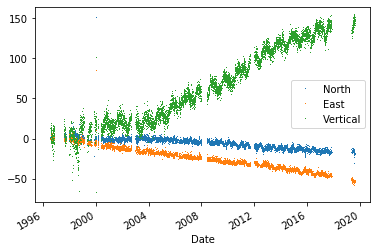

In [78]:
df[['North', 'East', 'Vertical']].plot(linestyle='', marker=',')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe4ebf83e10>],
      dtype=object)

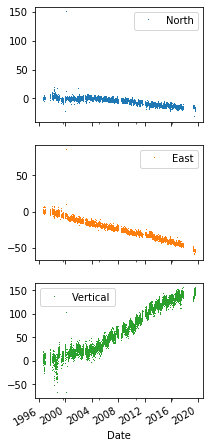

In [79]:
df[['North', 'East', 'Vertical']].plot(subplots=True, 
                                       layout=(3, 1), figsize=(3, 8), 
                                       linestyle='', marker=',',
                                       sharex=True)

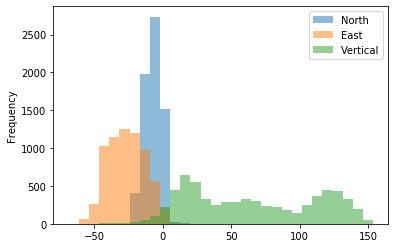

In [57]:
df[['North', 'East', 'Vertical']].plot.hist(alpha=0.5, bins=30)

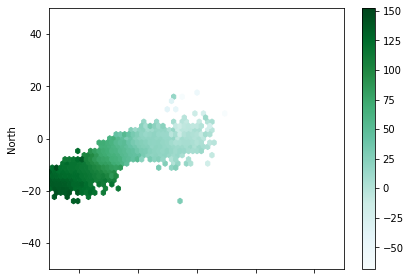

In [51]:
df.plot.hexbin(x='East', y='North', C='Vertical')
plt.xlim([-50, 50])
plt.ylim([-50, 50])
plt.tight_layout()

In [87]:
df.index[-1] - df.index[0]

Timedelta('8419 days 00:00:00')

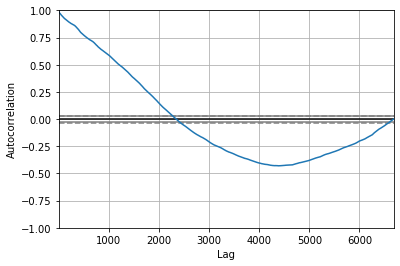

In [71]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df[['Vertical']])

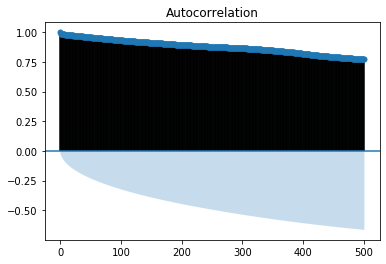

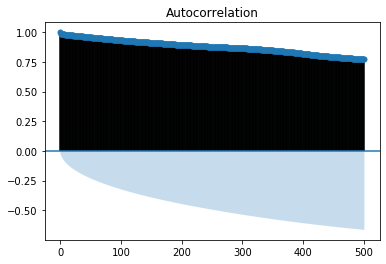

In [89]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df[['Vertical']], lags = 500)

In [70]:
df[['North', 'East', 'Vertical']].corr()

,North,East,Vertical
North,1.000000,0.852793,-0.876412
East,0.852793,1.000000,-0.943908
Vertical,-0.876412,-0.943908,1.000000
